Eigenfaces and reconstruction with 12 principal components:


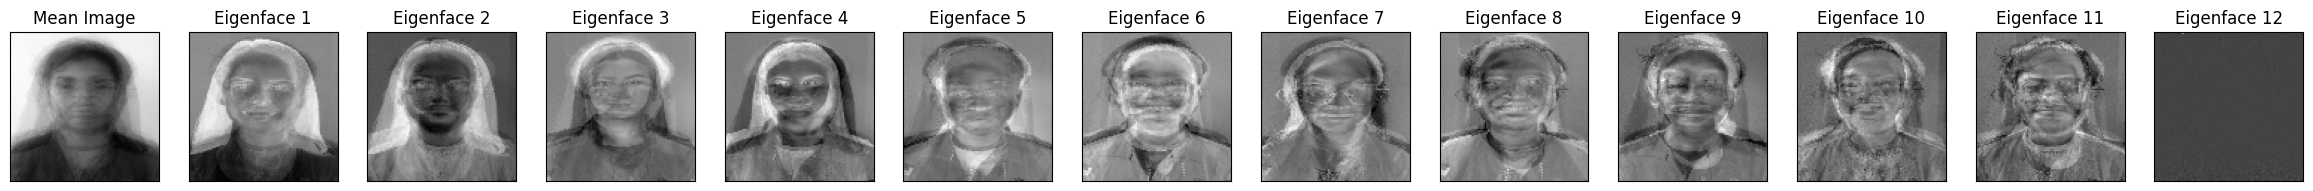

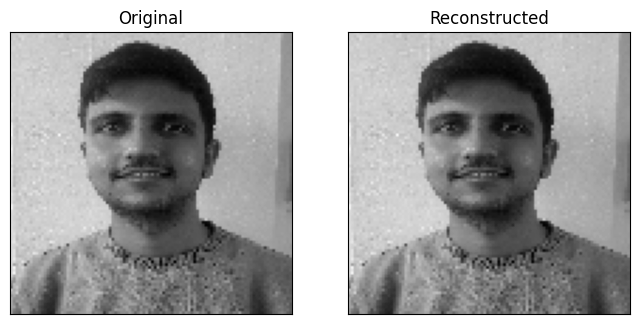

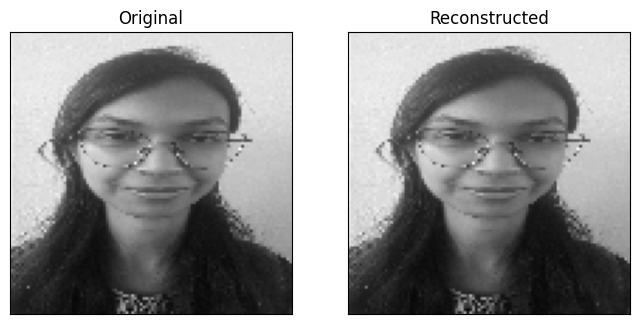

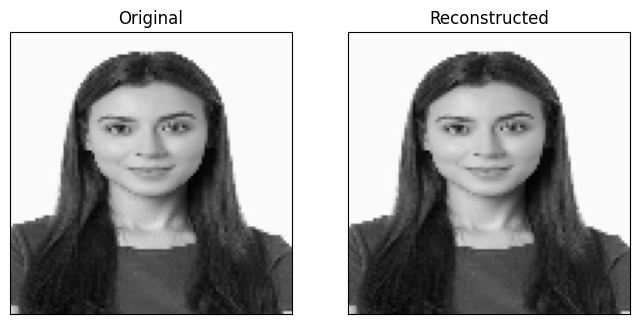

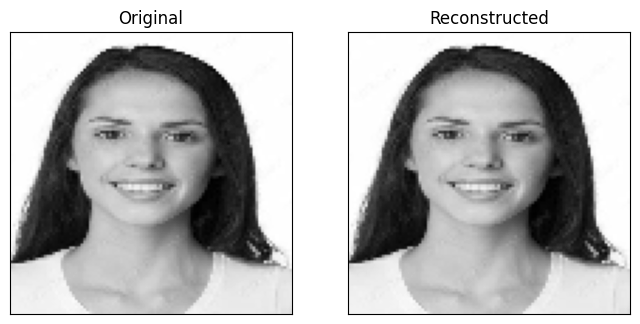

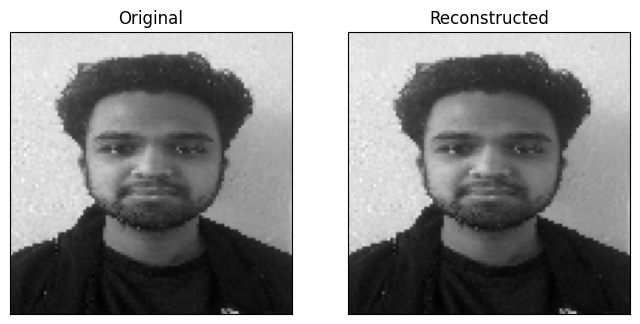

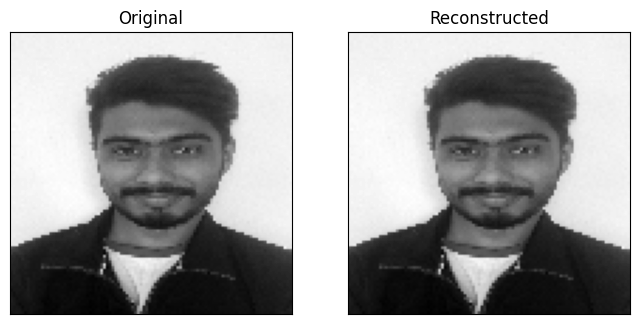

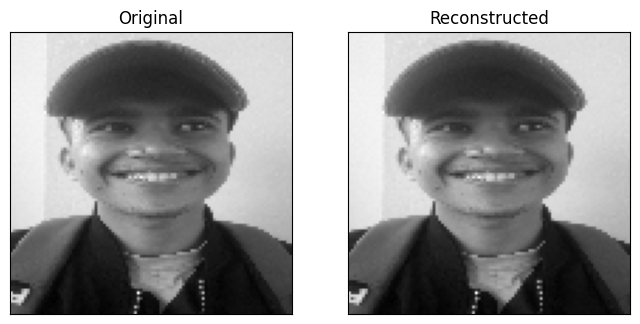

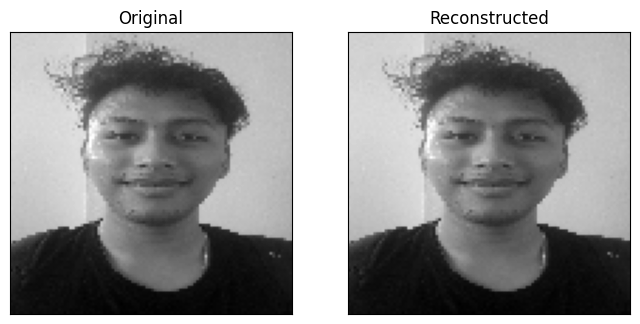

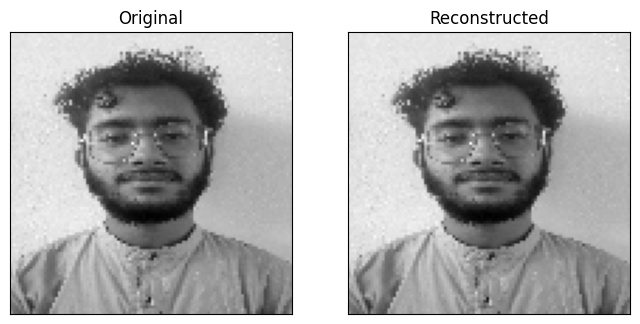

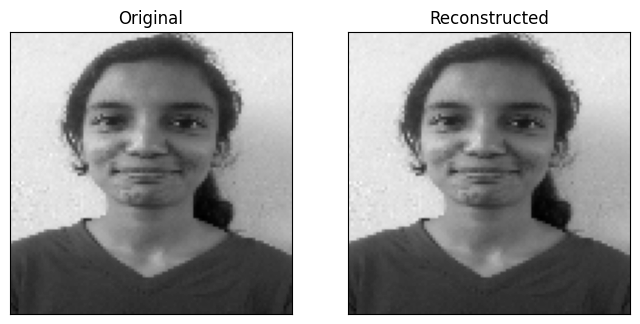

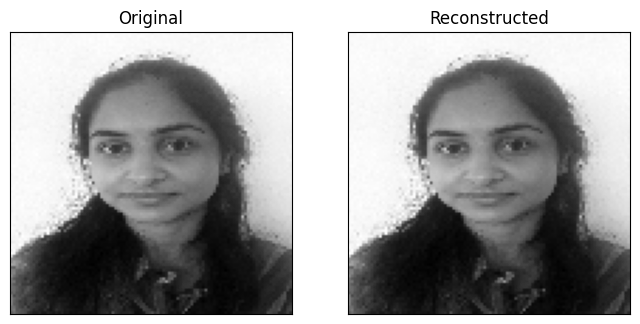

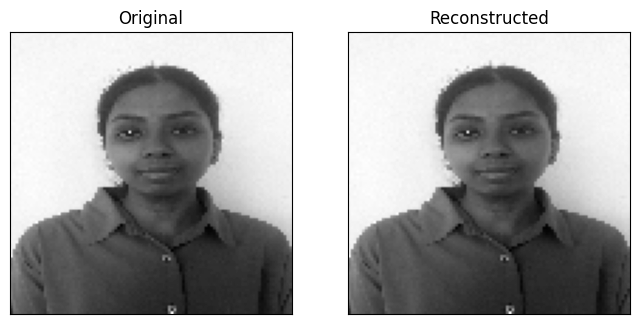

Image 1: MSE = 0.0000, PSNR = 312.4213, SSIM = 1.0000
Image 2: MSE = 0.0000, PSNR = 315.8577, SSIM = 1.0000
Image 3: MSE = 0.0000, PSNR = 309.7421, SSIM = 1.0000
Image 4: MSE = 0.0000, PSNR = 308.4583, SSIM = 1.0000
Image 5: MSE = 0.0000, PSNR = 310.9190, SSIM = 1.0000
Image 6: MSE = 0.0000, PSNR = 309.8100, SSIM = 1.0000
Image 7: MSE = 0.0000, PSNR = 309.9213, SSIM = 1.0000
Image 8: MSE = 0.0000, PSNR = 311.4866, SSIM = 1.0000
Image 9: MSE = 0.0000, PSNR = 309.9119, SSIM = 1.0000
Image 10: MSE = 0.0000, PSNR = 310.9385, SSIM = 1.0000
Image 11: MSE = 0.0000, PSNR = 311.0443, SSIM = 1.0000
Image 12: MSE = 0.0000, PSNR = 311.6517, SSIM = 1.0000
MSE for 12 components: [3.723448716192143e-27, 1.687754653857147e-27, 6.900319061439441e-27, 9.273632969434546e-27, 5.2623358509032225e-27, 6.793281365109261e-27, 6.621382894063085e-27, 4.6176559999625414e-27, 6.63574647342535e-27, 5.23874827874839e-27, 5.1126517029480696e-27, 4.445419265360206e-27]
PSNR for 12 components: [312.42134984272553, 315

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

img_row = 100
img_col = 100


# Function to load images from a directory, convert to grayscale, resize, and flatten
def load_images_from_folder(folder, target_size=(img_row, img_col)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, target_size)
            images.append(resized.flatten())
    return np.array(images)

# Load images with resizing
folder = './images'
images = load_images_from_folder(folder)

# Define a function to apply PCA manually, plot eigenfaces, reconstruct images, and compute metrics
def compute_and_reconstruct_eigenfaces_manual(images, n_components):
    # Step 1: Standardize the dataset (subtract the mean)
    mean_image = np.mean(images, axis=0)

    
    centered_images = images - mean_image
    
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(centered_images, rowvar=False)

    # Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort the eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top n_components eigenvectors (principal components)
    principal_components = sorted_eigenvectors[:, :n_components]

    # Step 6: Project the images onto the principal components
    projected_images = np.dot(centered_images, principal_components)

    # Step 7: Reconstruct the images from the projections
    reconstructed_images = np.dot(projected_images, principal_components.T) + mean_image

    # Compute the eigenfaces
    eigenfaces = principal_components.T.reshape((n_components, img_row, img_col))

    # Function to plot eigenfaces
    def plot_eigenfaces(eigenfaces, h, w, mean_image):
        n_components = len(eigenfaces)
        plt.figure(figsize=(1.8 * (n_components + 1), 2.4))
        plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
        
        # Plot mean image
        plt.subplot(1, n_components + 1, 1)
        plt.imshow(mean_image.reshape((h, w)), cmap=plt.cm.gray)
        plt.title("Mean Image")
        plt.xticks(())
        plt.yticks(())

        # Plot eigenfaces
        for i in range(n_components):
            plt.subplot(1, n_components + 1, i + 2)
            plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
            plt.title(f"Eigenface {i+1}")
            plt.xticks(())
            plt.yticks(())
        plt.show()

    # Function to compute and print MSE, PSNR, and SSIM
    def compute_metrics(original_images, reconstructed_images):
        mse_values = []
        psnr_values = []
        ssim_values = []
        n_samples = original_images.shape[0]
        for i in range(n_samples):
            original = original_images[i].reshape((img_row, img_col))
            reconstructed = reconstructed_images[i].reshape((img_row, img_col))
            mse = mean_squared_error(original, reconstructed)
            psnr = peak_signal_noise_ratio(original, reconstructed, data_range=255)
            ssim = structural_similarity(original, reconstructed, data_range=255)
            mse_values.append(mse)
            psnr_values.append(psnr)
            ssim_values.append(ssim)
            print(f"Image {i+1}: MSE = {mse:.4f}, PSNR = {psnr:.4f}, SSIM = {ssim:.4f}")
        return mse_values, psnr_values, ssim_values

    # Plot the eigenfaces with the mean image
    plot_eigenfaces(eigenfaces, img_row, img_col, mean_image)

    # Plot the original and reconstructed images
    def plot_reconstructed_images(images, reconstructed_images, h, w):
        n_samples = images.shape[0]
        for i in range(n_samples):
            plt.figure(figsize=(8, 4))
            # Original images
            plt.subplot(1, 2, 1)
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
            plt.title("Original")
            plt.xticks(())
            plt.yticks(())
            # Reconstructed images
            plt.subplot(1, 2, 2)
            plt.imshow(reconstructed_images[i].reshape((h, w)), cmap=plt.cm.gray)
            plt.title("Reconstructed")
            plt.xticks(())
            plt.yticks(())
            plt.show()

    # Plot the original and reconstructed images
    plot_reconstructed_images(images, reconstructed_images, img_row, img_col)

    # Compute and print metrics
    mse_values, psnr_values, ssim_values = compute_metrics(images, reconstructed_images)
    return mse_values, psnr_values, ssim_values

# Compute and plot eigenfaces and reconstructed images with different numbers of components
for n_components in [12]:
    print(f"Eigenfaces and reconstruction with {n_components} principal components:")
    mse_values, psnr_values, ssim_values = compute_and_reconstruct_eigenfaces_manual(images, n_components)
    print(f"MSE for {n_components} components: {mse_values}")
    print(f"PSNR for {n_components} components: {psnr_values}")
    print(f"SSI for {n_components} components: {ssim_values}")
